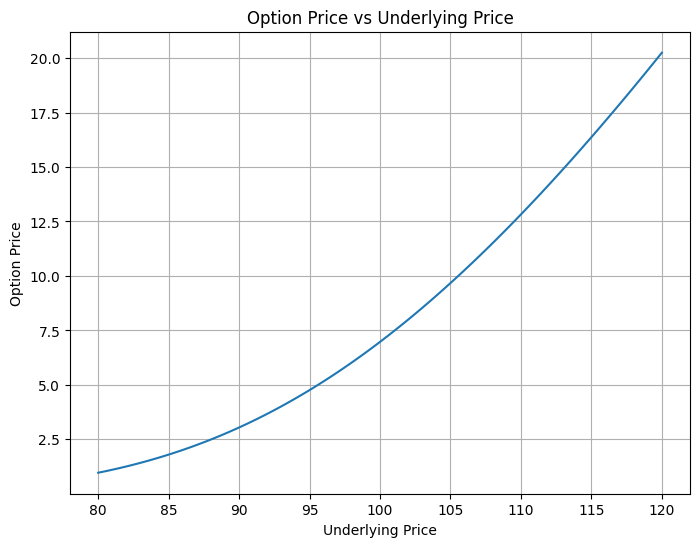

Option price: 6.973108054699485


In [10]:
import QuantLib as ql
import matplotlib.pyplot as plt
import numpy as np

# Option parameters
spot_price = 100.0  # Spot price of the underlying asset
strike_price = 105.0  # Strike price of the option
risk_free_rate = 0.05  # Risk-free interest rate
dividend_rate = 0.02  # Dividend yield of the underlying asset
expiration_date = ql.Date(31, 12, 2023)  # Expiration date of the option
volatility = 0.2  # Volatility of the underlying asset

# QuantLib objects
calculation_date = ql.Date(1, 1, 2023)
ql.Settings.instance().evaluationDate = calculation_date

# Define the option
payoff = ql.PlainVanillaPayoff(ql.Option.Call, strike_price)
exercise = ql.EuropeanExercise(expiration_date)
option = ql.VanillaOption(payoff, exercise)

# Define the underlying asset
spot_handle = ql.QuoteHandle(ql.SimpleQuote(spot_price))
flat_ts = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, risk_free_rate, ql.Actual365Fixed())
)
dividend_yield = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, dividend_rate, ql.Actual365Fixed())
)
volatility_handle = ql.BlackVolTermStructureHandle(
    ql.BlackConstantVol(calculation_date, ql.TARGET(), volatility, ql.Actual365Fixed())
)
process = ql.BlackScholesMertonProcess(spot_handle, dividend_yield, flat_ts, volatility_handle)

# Calculate the option price for a range of underlying prices
underlying_prices = np.linspace(80, 120, 100)
option_prices = []

for price in underlying_prices:
    spot_handle = ql.QuoteHandle(ql.SimpleQuote(price))
    process = ql.BlackScholesMertonProcess(spot_handle, dividend_yield, flat_ts, volatility_handle)
    option.setPricingEngine(ql.AnalyticEuropeanEngine(process))
    option_prices.append(option.NPV())

# Plot the option price as a function of the underlying price
plt.figure(figsize=(8, 6))
plt.plot(underlying_prices, option_prices)
plt.xlabel("Underlying Price")
plt.ylabel("Option Price")
plt.title("Option Price vs Underlying Price")
plt.grid(True)
plt.show()

# Print the result
print("Option price:", option_price)